In [28]:
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,16)
%matplotlib inline

from PlotTools import plot_tools as PTs


In [45]:
ANCILS_DIR='/prj/CLIFFTOP/COMMON_DATA/ANCILS/'

LULUC_file=ANCILS_DIR+'SSP2_baseline_JULES_N48_landcover_1700-2100_ImogenGrid.nc'
crop_name,past_name='frac_crop','frac_pasture'
lat_name,lon_name,time_name='latitude','longitude','time'


LULUC_file_old = ANCILS_DIR+'NoLuMIT_RCP26_JULES_N48_IMAGElandcover_1700-2100_ImogenGrid.nc'
crop_name_old,past_name_old='frac_crop','frac_pasture'
lat_name_old,lon_name_old,time_name_old='latitude','longitude','time'


AREA_file= ANCILS_DIR+'grid_info.nc'


In [46]:
OUTDIR=ANCILS_DIR+'plots/'

In [47]:

#Read in current LULUC data
inf=nc.Dataset(LULUC_file,'r')
frac_crop_cur=inf.variables[crop_name][:]
frac_past_cur=inf.variables[past_name][:]
lat_cur,lon_cur=inf.variables[lat_name][:],inf.variables[lon_name][:]

time_var=inf.variables[time_name]
time_cur=nc.num2date(time_var[:],units=time_var.units,calendar=time_var.calendar)

inf.close()


#Read in old LULUC data
inf=nc.Dataset(LULUC_file_old,'r')
frac_crop_old=inf.variables[crop_name][:]
frac_past_old=inf.variables[past_name][:]
lat_old,lon_old=inf.variables[lat_name][:],inf.variables[lon_name][:]

time_var=inf.variables[time_name_old]
time_old=nc.num2date(time_var[:],units=time_var.units,calendar=time_var.calendar)

inf.close()



In [49]:
# Read in Area and 2D lat and lons
inf=nc.Dataset(AREA_file)
Area=inf.variables['Area'][:].squeeze()
lats_2d=inf.variables['latitude'][:]
lons_2d=inf.variables['longitude'][:]
inf.close()

In [50]:
year_cur = np.array([time.year for time in time_cur])
year_old = np.array([time.year for time in time_old])

In [67]:
plot_year=1850

cur_index=np.where(year_cur==plot_year)[0][0]
print(cur_index)
old_index=np.where(year_old==plot_year)[0][0]
print(old_index)




150
150


In [79]:
CROP_AREA_cur=frac_crop_cur*Area *1e-4  #(convert to hectares)
PAST_AREA_cur=frac_past_cur*Area *1e-4  

CROP_AREA_old=frac_crop_old*Area *1e-4  
PAST_AREA_old=frac_past_old*Area *1e-4  


In [80]:
TOTAL_CROP_AREA_cur = np.sum(CROP_AREA_cur[cur_index,:])*1e-6
TOTAL_PAST_AREA_cur = np.sum(PAST_AREA_cur[cur_index,:])*1e-6

TOTAL_CROP_AREA_old = np.sum(CROP_AREA_old[old_index,:])*1e-6
TOTAL_PAST_AREA_old = np.sum(PAST_AREA_old[old_index,:])*1e-6

print('%10a'%('Map')+3*'%20a' %('Total Crop', 'Total Pasture','Total Agriculture') )
print('%10a'%('old')+3*'%20.4f'%(TOTAL_CROP_AREA_old,TOTAL_PAST_AREA_old,TOTAL_CROP_AREA_old+TOTAL_PAST_AREA_old))
print('%10a'%('current')+3*'%20.4f'%(TOTAL_CROP_AREA_cur,TOTAL_PAST_AREA_cur,TOTAL_CROP_AREA_cur+TOTAL_PAST_AREA_cur))


     'Map'        'Total Crop'     'Total Pasture' 'Total Agriculture'
     'old'           1038.9262            955.3247           1994.2509
 'current'            608.0159            715.7611           1323.7770


In [83]:

TOTAL_CROP_AREA_cur_TS = np.sum(CROP_AREA_cur.reshape(CROP_AREA_cur.shape[0],-1),axis=1)*1e-6

TOTAL_PAST_AREA_cur_TS = np.sum(PAST_AREA_cur.reshape(PAST_AREA_cur.shape[0],-1),axis=1)*1e-6

TOTAL_CROP_AREA_old_TS = np.sum(CROP_AREA_old.reshape(CROP_AREA_old.shape[0],-1),axis=1)*1e-6

TOTAL_PAST_AREA_old_TS = np.sum(PAST_AREA_old.reshape(PAST_AREA_old.shape[0],-1),axis=1)*1e-6
#TOTAL_PAST_AREA_cur = np.sum(frac_past_cur[cur_index,:]*Area)*1e-10

#TOTAL_CROP_AREA_old = np.sum(frac_crop_old[old_index,:]*Area)*1e-10#
#TOTAL_PAST_AREA_old = np.sum(frac_past_old[old_index,:]*Area)*1e-10



In [86]:
print(plot_year)
print('%10a'%('Map')+3*'%20a' %('Total Crop', 'Total Pasture','Total Agriculture') )
print('%10a'%('old')+3*'%20.4f'%(TOTAL_CROP_AREA_old_TS[old_index],TOTAL_PAST_AREA_old_TS[old_index],
                                 (TOTAL_CROP_AREA_old_TS+TOTAL_PAST_AREA_old_TS)[old_index]))

print('%10a'%('cur')+3*'%20.4f'%(TOTAL_CROP_AREA_cur_TS[cur_index],TOTAL_PAST_AREA_cur_TS[cur_index],
                                 (TOTAL_CROP_AREA_cur_TS+TOTAL_PAST_AREA_cur_TS)[cur_index]))

1850
     'Map'        'Total Crop'     'Total Pasture' 'Total Agriculture'
     'old'           1038.9261            955.3246           1994.2507
     'cur'            608.0159            715.7611           1323.7770


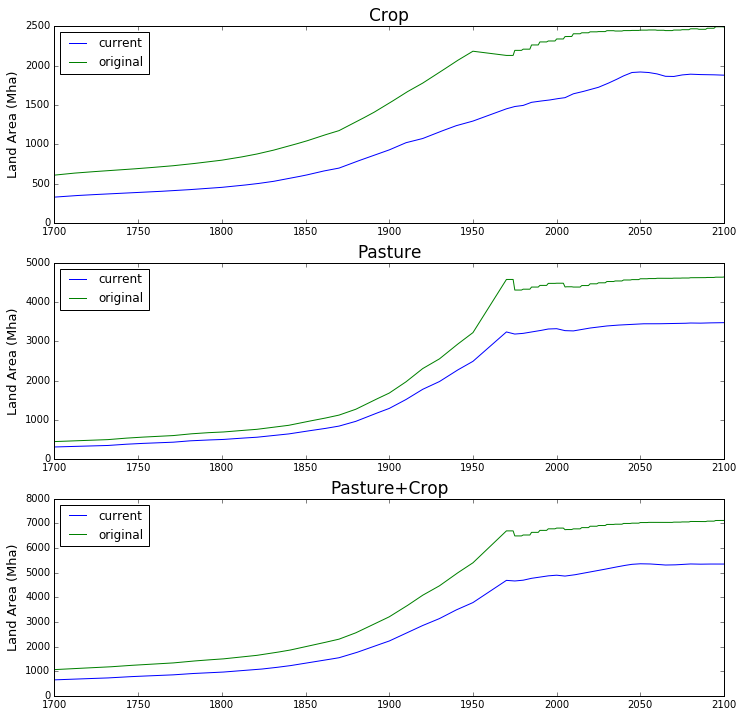

In [93]:
fig,axes=plt.subplots(figsize=(12,12),ncols=1,nrows=3)
ax=axes[0]
ax.plot(year_cur,TOTAL_CROP_AREA_cur_TS,label='current')
ax.plot(year_old,TOTAL_CROP_AREA_old_TS,label='original')
ax.set_ylabel('Land Area (Mha)',fontsize=13)
ax.legend(loc=2)
ax.set_title('Crop',fontsize=17)

ax=axes[1]
ax.plot(year_cur,TOTAL_PAST_AREA_cur_TS,label='current')
ax.plot(year_old,TOTAL_PAST_AREA_old_TS,label='original')
ax.set_ylabel('Land Area (Mha)',fontsize=13)
ax.legend(loc=2)
ax.set_title('Pasture',fontsize=17)

ax=axes[2]
ax.plot(year_cur,TOTAL_PAST_AREA_cur_TS+TOTAL_CROP_AREA_cur_TS,label='current')
ax.plot(year_old,TOTAL_PAST_AREA_old_TS+TOTAL_CROP_AREA_old_TS,label='original')
ax.set_ylabel('Land Area (Mha)',fontsize=13)
ax.legend(loc=2)
ax.set_title('Pasture+Crop',fontsize=17)
